In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML  
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'H2NZQN05FD0V0DFDN1FO5VR2ZKCDKCKUJPSYEALGQJCLIUQJ' # your Foursquare ID
CLIENT_SECRET = 'CNTMAUZVWIPTZXHE3ZGEQ1AAFHHRP5YY1GIWRPOS2EEIF1YS' # your Foursquare Secret
ACCESS_TOKEN = 'IS3OD3HKPHOHEQQ2YQOLDBHYMAPQCCJAOA5LHWV4DVTBLK50' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H2NZQN05FD0V0DFDN1FO5VR2ZKCDKCKUJPSYEALGQJCLIUQJ
CLIENT_SECRET:CNTMAUZVWIPTZXHE3ZGEQ1AAFHHRP5YY1GIWRPOS2EEIF1YS


In [3]:
search_query = 'Asian'
radius = 500
print(search_query + ' .... OK!')

Asian .... OK!


In [4]:
city_data=[]
list_of_cities = ['Tokyo','Kuala Lumpur','Bangkok','New York City']
for city in list_of_cities:
    address = city
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('For {}, The latitude is: {} and Longitude is: {}'.format(city, latitude, longitude))
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    url
    print('The url for {}: is {}'.format(city,url))
    results = requests.get(url).json()
    results.keys()
    results['response'].keys()
    items = results['response']['groups'][0]['items']
    print('There are {} observations and {} columns for each item around {}'.format(json_normalize(items).shape[0],json_normalize(items).shape[1],city))
    city_data.append(json_normalize(items))
    print('-'*20)
print('All datasets are into city_data list!')

For Tokyo, The latitude is: 35.6828387 and Longitude is: 139.7594549
The url for Tokyo: is https://api.foursquare.com/v2/venues/explore?client_id=H2NZQN05FD0V0DFDN1FO5VR2ZKCDKCKUJPSYEALGQJCLIUQJ&client_secret=CNTMAUZVWIPTZXHE3ZGEQ1AAFHHRP5YY1GIWRPOS2EEIF1YS&ll=35.6828387,139.7594549&v=20180604&radius=500&limit=30
There are 30 observations and 22 columns for each item around Tokyo
--------------------
For Kuala Lumpur, The latitude is: 3.1516964 and Longitude is: 101.6942371
The url for Kuala Lumpur: is https://api.foursquare.com/v2/venues/explore?client_id=H2NZQN05FD0V0DFDN1FO5VR2ZKCDKCKUJPSYEALGQJCLIUQJ&client_secret=CNTMAUZVWIPTZXHE3ZGEQ1AAFHHRP5YY1GIWRPOS2EEIF1YS&ll=3.1516964,101.6942371&v=20180604&radius=500&limit=30
There are 30 observations and 22 columns for each item around Kuala Lumpur
--------------------
For Bangkok, The latitude is: 13.7544238 and Longitude is: 100.4930399
The url for Bangkok: is https://api.foursquare.com/v2/venues/explore?client_id=H2NZQN05FD0V0DFDN1FO5VR

In [5]:
def get_cities(df):
    df0 = df[0]
    df1 = df[1]
    df2 = df[2]
    df3 = df[3]
    return [df0, df1, df2, df3]

In [6]:
def get_category_type(row):
    categories_list = row['categories']   
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
df_tokyo = get_cities(city_data)[0]
df_Kuala_Lumpur = get_cities(city_data)[1]
df_Bangkok = get_cities(city_data)[2]
df_New_York = get_cities(city_data)[3]
dataset = [df_tokyo, df_Kuala_Lumpur, df_Bangkok, df_New_York]
#finding only the common columns between all datasets so that I can compare between them
common_cols = list(set.intersection(*(set(city.columns) for city in dataset)))
common_cols

['venue.location.country',
 'venue.location.distance',
 'venue.location.labeledLatLngs',
 'venue.location.state',
 'venue.categories',
 'reasons.count',
 'venue.location.address',
 'reasons.items',
 'referralId',
 'venue.location.crossStreet',
 'venue.location.lng',
 'venue.location.lat',
 'venue.id',
 'venue.photos.count',
 'venue.location.cc',
 'venue.photos.groups',
 'venue.location.city',
 'venue.location.formattedAddress',
 'venue.name']

In [8]:
df_New_York.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id
0,e-0-5467e80f498ecfc74854fe59-0,0,"[{'summary': 'This spot is popular', 'type': '...",5467e80f498ecfc74854fe59,Lúbara,"Colonia Tepeyac, Calle Ocotepeque, Avenida Gra...",14.092136,-87.192403,"[{'label': 'display', 'lat': 14.09213577275869...",136,HN,Tegucigalpa,Francisco Morazán,Honduras,"[Colonia Tepeyac, Calle Ocotepeque, Avenida Gr...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN
1,e-0-4e7a391aae60757c759ef263-1,0,"[{'summary': 'This spot is popular', 'type': '...",4e7a391aae60757c759ef263,Mandarin Oriental,Col. Tepeyac,14.094403,-87.191071,"[{'label': 'display', 'lat': 14.09440284266265...",254,HN,Tegucigalpa,Francisco Morazán,Honduras,"[Col. Tepeyac, Tegucigalpa, Francisco Morazán,...","[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",0,[],NaN,NaN
2,e-0-4ef1591d93adbace602edea9-2,0,"[{'summary': 'This spot is popular', 'type': '...",4ef1591d93adbace602edea9,RadioHouse,Colonia Tepeyac,14.091832,-87.190964,"[{'label': 'display', 'lat': 14.09183230692555...",37,HN,Tegucigalpa,Francisco Morazán,Honduras,"[Colonia Tepeyac (Calle Yoro), Tegucigalpa, Fr...","[{'id': '4bf58dd8d48988d11d941735', 'name': 'S...",0,[],Calle Yoro,NaN
3,e-0-4d0127cd1ebe6dcb47ae8b91-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d0127cd1ebe6dcb47ae8b91,Hacienda Real,Calle Corea del Sur,14.088421,-87.190658,"[{'label': 'display', 'lat': 14.08842109818923...",415,HN,Tegucigalpa,Francisco Morazán,Honduras,[Calle Corea del Sur (Boulevard Juan Pablo II)...,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",0,[],Boulevard Juan Pablo II,NaN
4,e-0-4b9c54f4f964a520396036e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b9c54f4f964a520396036e3,Coco Baleadas,NaN,14.092092,-87.194032,"[{'label': 'display', 'lat': 14.09209153999983...",312,HN,Tegucigalpa,Francisco Morazán,Honduras,"[Tegucigalpa, Francisco Morazán, Honduras]","[{'id': '4bf58dd8d48988d1be941735', 'name': 'L...",0,[],NaN,NaN


In [9]:
filtered_city = []
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lng','venue.location.lat']
for city in dataset:
    new_city = city.loc[:,filtered_columns]
    new_city.columns = [col.split('.')[-1] for col in new_city.columns]
    new_city['categories'] = new_city.apply(get_category_type, axis=1)
    filtered_city.append(new_city)
filtered_city[0].columns

Index(['name', 'categories', 'lng', 'lat'], dtype='object')

In [10]:
df_filtered_tokyo = get_cities(filtered_city)[0]
df_filtered_Kuala_Lumpur = get_cities(filtered_city)[1]
df_filtered_Bangkok = get_cities(filtered_city)[2]
df_filtered_New_York = get_cities(filtered_city)[3]

In [11]:
df_filtered_tokyo.head()

,name,categories,lng,lat
0,Grand Kitchen,American Restaurant,139.761426,35.684026
1,Wadakura Fountain Park (和田倉噴水公園),Park,139.760829,35.683453
2,Palace Hotel Tokyo (パレスホテル東京),Hotel,139.761302,35.684644
3,Sushi Kanesaka (鮨 かねさか),Sushi Restaurant,139.761064,35.684559
4,Amber Palace (琥珀宮),Chinese Restaurant,139.761458,35.684647


In [12]:
print ('The most common categories to visit in Tokyo are:') 
df_filtered_tokyo.categories.value_counts()

The most common categories to visit in Tokyo are:


Historic Site                    5
Lounge                           2
Park                             2
Wine Bar                         1
American Restaurant              1
Garden                           1
Dessert Shop                     1
Electronics Store                1
Café                             1
Road                             1
Sports Club                      1
Steakhouse                       1
Paper / Office Supplies Store    1
Burger Joint                     1
Italian Restaurant               1
Chinese Restaurant               1
Plaza                            1
Hotel                            1
Hotel Bar                        1
Japanese Restaurant              1
Brazilian Restaurant             1
Sushi Restaurant                 1
Mediterranean Restaurant         1
Supermarket                      1
Name: categories, dtype: int64

In [13]:
df_filtered_Kuala_Lumpur.head()

,name,categories,lng,lat
0,Adya Hotel Kuala Lumpur,Hotel,101.695623,3.151703
1,Restoran Jai Hind,Indian Restaurant,101.696074,3.151061
2,Cafeteria DBKL,Asian Restaurant,101.694922,3.152154
3,Syawarma Raihani Kebab,Kebab Restaurant,101.696364,3.153069
4,TEH Songket,Bridal Shop,101.695964,3.152254


In [14]:
print ('The most common categories to visit in Kuala_Lumpur are:') 
df_filtered_Kuala_Lumpur.categories.value_counts()

The most common categories to visit in Kuala_Lumpur are:


Indian Restaurant                6
Café                             2
Hotel                            2
Coffee Shop                      2
Asian Restaurant                 1
South Indian Restaurant          1
Food Truck                       1
Monument / Landmark              1
Night Market                     1
Men's Store                      1
Bridal Shop                      1
Chettinad Restaurant             1
Kebab Restaurant                 1
Theater                          1
Sporting Goods Shop              1
Art Gallery                      1
Boutique                         1
Vegetarian / Vegan Restaurant    1
Restaurant                       1
Athletics & Sports               1
Flea Market                      1
Gym                              1
Name: categories, dtype: int64

In [15]:
df_filtered_Bangkok.head()

,name,categories,lng,lat
0,Café VeloDome (คาเฟ่ เวโลโดม),Café,100.491980,13.755783
1,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...,Buddhist Temple,100.492651,13.751735
2,Thokkathan-Mother Earth Squeezing Her Hair (พร...,Spiritual Center,100.494767,13.756602
3,Prasat Phra Thep Bidon (ปราสาทพระเทพบิดร),Palace,100.492720,13.751606
4,The Grand Palace (พระบรมมหาราชวัง),Palace,100.491176,13.751814


In [16]:
print ('The most common categories to visit in Bangkok are:') 
df_filtered_Bangkok.categories.value_counts()

The most common categories to visit in Bangkok are:


Buddhist Temple        2
History Museum         2
Noodle House           2
Historic Site          2
Dessert Shop           2
Palace                 2
Café                   2
Art Museum             1
Neighborhood           1
Coffee Shop            1
Chinese Restaurant     1
Wings Joint            1
Shopping Mall          1
Museum                 1
Hotel                  1
College Bookstore      1
Bakery                 1
Japanese Restaurant    1
Spiritual Center       1
Soup Place             1
Thai Restaurant        1
Theater                1
Name: categories, dtype: int64

In [17]:
df_filtered_New_York.head()

,name,categories,lng,lat
0,Lúbara,Café,-87.192403,14.092136
1,Mandarin Oriental,Chinese Restaurant,-87.191071,14.094403
2,RadioHouse,Sports Bar,-87.190964,14.091832
3,Hacienda Real,Steakhouse,-87.190658,14.088421
4,Coco Baleadas,Latin American Restaurant,-87.194032,14.092092


In [18]:
print ('The most common categories to visit in New_York are:') 
df_filtered_New_York.categories.value_counts()

The most common categories to visit in New_York are:


Chinese Restaurant           3
Latin American Restaurant    3
Hotel                        3
Mexican Restaurant           2
Café                         2
Fast Food Restaurant         2
French Restaurant            1
Burger Joint                 1
Breakfast Spot               1
Beer Garden                  1
Juice Bar                    1
Coffee Shop                  1
American Restaurant          1
Sandwich Place               1
Hotel Bar                    1
Bistro                       1
Bakery                       1
Pizza Place                  1
Sports Bar                   1
Steakhouse                   1
Gym                          1
Name: categories, dtype: int64

In [19]:
df_filtered_Kuala_Lumpur['city'] = 'Kuala_Lumpur'
df_filtered_New_York['city'] = 'New_York'
df_filtered_tokyo['city'] = 'tokyo'
df_filtered_Bangkok ['city'] = 'bangkok'
Total = pd.concat([df_filtered_Kuala_Lumpur, df_filtered_New_York, df_filtered_tokyo, df_filtered_Bangkok])
Total.head()

,name,categories,lng,lat,city
0,Adya Hotel Kuala Lumpur,Hotel,101.695623,3.151703,Kuala_Lumpur
1,Restoran Jai Hind,Indian Restaurant,101.696074,3.151061,Kuala_Lumpur
2,Cafeteria DBKL,Asian Restaurant,101.694922,3.152154,Kuala_Lumpur
3,Syawarma Raihani Kebab,Kebab Restaurant,101.696364,3.153069,Kuala_Lumpur
4,TEH Songket,Bridal Shop,101.695964,3.152254,Kuala_Lumpur


In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(Total.lat, Total.lng, Total.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

    
# display map
venues_map

In [21]:
most_NY = pd.DataFrame(df_filtered_New_York.categories.value_counts(1).round(2))
most_BK = pd.DataFrame(df_filtered_Bangkok.categories.value_counts(1).round(2))
most_TO = pd.DataFrame(df_filtered_tokyo.categories.value_counts(1).round(2))
most_KL =  pd.DataFrame(df_filtered_Kuala_Lumpur.categories.value_counts(1).round(2))
df1 = pd.merge(most_NY, most_BK, left_index=True, right_index=True, how = 'outer')
df1.rename(columns={'categories_x':'New_York', 'categories_y':'Bangkok'}, inplace=True)
df2 = pd.merge(df1, most_TO, left_index=True, right_index=True, how = 'outer')
Available_venues = pd.merge(df2, most_KL, left_index=True, right_index=True, how = 'outer')
Available_venues.rename(columns={'categories_x':'Tokyo', 'categories_y':'Kuala_Lumpur'}, inplace=True)
Available_venues = Available_venues.T
Available_venues.fillna(0, inplace=True)
Available_venues

,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,Beer Garden,Bistro,Boutique,Brazilian Restaurant,...,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint
New_York,0.03,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.00,0.00,...,0.03,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bangkok,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.03
Tokyo,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,...,0.00,0.03,0.03,0.03,0.03,0.00,0.00,0.00,0.03,0.00
Kuala_Lumpur,0.00,0.03,0.00,0.03,0.03,0.00,0.00,0.00,0.03,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00


In [22]:
from sklearn.preprocessing import StandardScaler

X = Available_venues.values[:,:]
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset;

In [23]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=20)
k_means.fit(Available_venues)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
Available_venues['Similarity_Factor'] = k_means_labels
Available_venues

,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,Beer Garden,Bistro,Boutique,Brazilian Restaurant,...,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint,Similarity_Factor
New_York,0.03,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.00,0.00,...,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
Bangkok,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.03,1
Tokyo,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,...,0.03,0.03,0.03,0.03,0.00,0.00,0.00,0.03,0.00,1
Kuala_Lumpur,0.00,0.03,0.00,0.03,0.03,0.00,0.00,0.00,0.03,0.00,...,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0


In [33]:
Similarity = Available_venues.loc[:,['Similarity_Factor']]
Similarity

,Similarity_Factor
New_York,0
Bangkok,1
Tokyo,1
Kuala_Lumpur,0


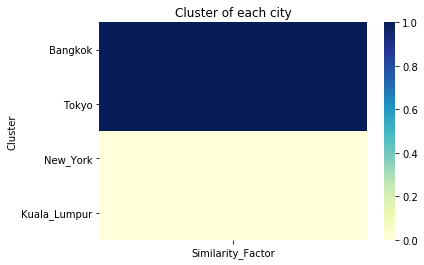

In [34]:
import seaborn as sns
sns.heatmap(Similarity.sort_values(by=['Similarity_Factor'], ascending=False), cmap="YlGnBu")
plt.ylabel('Cluster')
plt.title('Cluster of each city')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0);

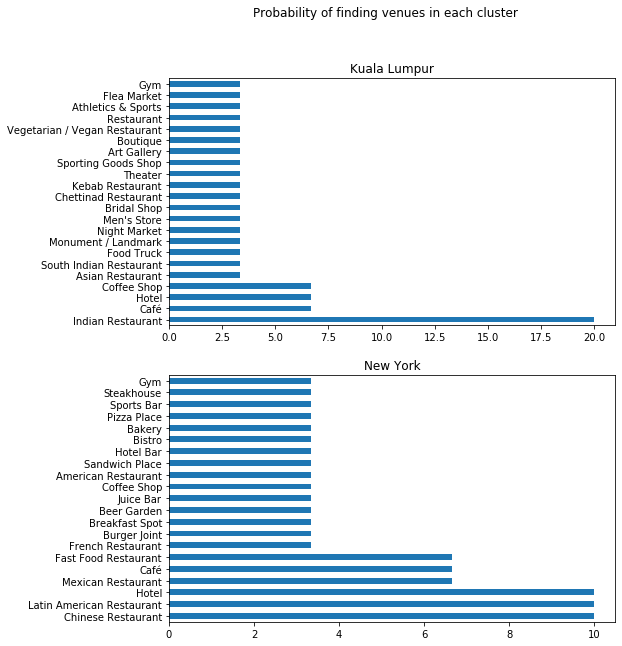

In [43]:
plt.subplots(2,1, figsize=(8,10))
plt.subplot(2,1,1)
(df_filtered_Kuala_Lumpur.categories.value_counts(1)*100).plot(kind='barh');
plt.title('Kuala Lumpur')
plt.subplot(2,1,2)
(df_filtered_New_York.categories.value_counts(1)*100).plot(kind='barh');
plt.title('New York')
plt.suptitle('Probability of finding venues in each cluster');

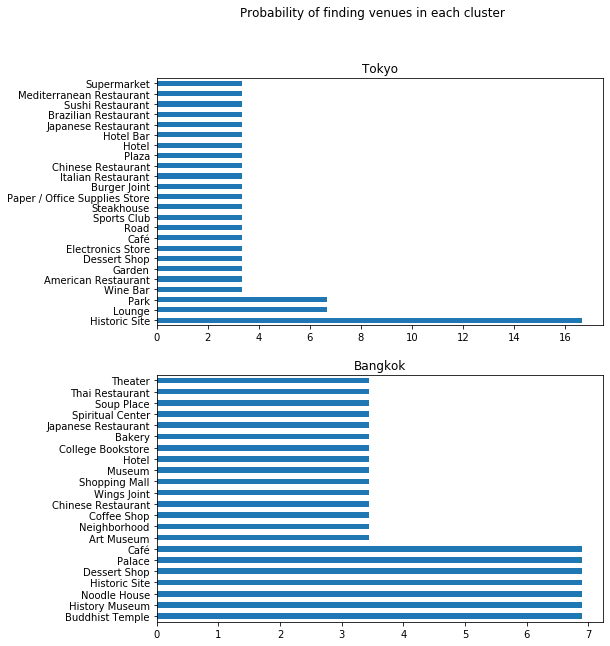

In [40]:
plt.subplots(2,1, figsize=(8,10))
plt.subplot(2,1,1)
(df_filtered_tokyo.categories.value_counts(1)*100).plot(kind='barh')
plt.title('Tokyo')
plt.subplot(2,1,2)
(df_filtered_Bangkok.categories.value_counts(1)*100).plot(kind='barh')
plt.title('Bangkok')
plt.suptitle('Probability of finding venues in each cluster');